In [1]:
import sqlite3

In [14]:
import astropy.units as u

In [24]:
import numpy as np

In [27]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt

In [45]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [7]:
con = sqlite3.connect('/epyc/projects/jpl_survey_sim/10yrs/opsims/march_start_v2.1_10yrs.db')

In [8]:
cur = con.cursor()

In [21]:
schema = cur.execute("PRAGMA table_info(observations)")
schema.fetchall()

[(0, 'observationId', 'INTEGER', 0, None, 0),
 (1, 'fieldRA', 'REAL', 0, None, 0),
 (2, 'fieldDec', 'REAL', 0, None, 0),
 (3, 'observationStartMJD', 'REAL', 0, None, 0),
 (4, 'flush_by_mjd', 'REAL', 0, None, 0),
 (5, 'visitExposureTime', 'REAL', 0, None, 0),
 (6, 'filter', 'TEXT', 0, None, 0),
 (7, 'rotSkyPos', 'REAL', 0, None, 0),
 (8, 'rotSkyPos_desired', 'REAL', 0, None, 0),
 (9, 'numExposures', 'INTEGER', 0, None, 0),
 (10, 'airmass', 'REAL', 0, None, 0),
 (11, 'seeingFwhm500', 'REAL', 0, None, 0),
 (12, 'seeingFwhmEff', 'REAL', 0, None, 0),
 (13, 'seeingFwhmGeom', 'REAL', 0, None, 0),
 (14, 'skyBrightness', 'REAL', 0, None, 0),
 (15, 'night', 'INTEGER', 0, None, 0),
 (16, 'slewTime', 'REAL', 0, None, 0),
 (17, 'visitTime', 'REAL', 0, None, 0),
 (18, 'slewDistance', 'REAL', 0, None, 0),
 (19, 'fiveSigmaDepth', 'REAL', 0, None, 0),
 (20, 'altitude', 'REAL', 0, None, 0),
 (21, 'azimuth', 'REAL', 0, None, 0),
 (22, 'paraAngle', 'REAL', 0, None, 0),
 (23, 'cloud', 'REAL', 0, None, 0),


In [60]:
fields = ["fieldRA", "fieldDec", "observationStartMJD",
          "flush_by_mjd", "visitExposureTime", "numExposures",
          "visitTime"]
night = 1

In [61]:
res = cur.execute(f"select {','.join(fields)} from observations where night={night}")
df = pd.DataFrame(res.fetchall(), columns=fields)

In [76]:
row

(0,
 fieldRA                  101.272296
 fieldDec                 -41.243877
 observationStartMJD    59639.009023
 flush_by_mjd           59639.038108
 visitExposureTime         30.000000
 numExposures               2.000000
 visitTime                 34.000000
 Name: 0, dtype: float64)

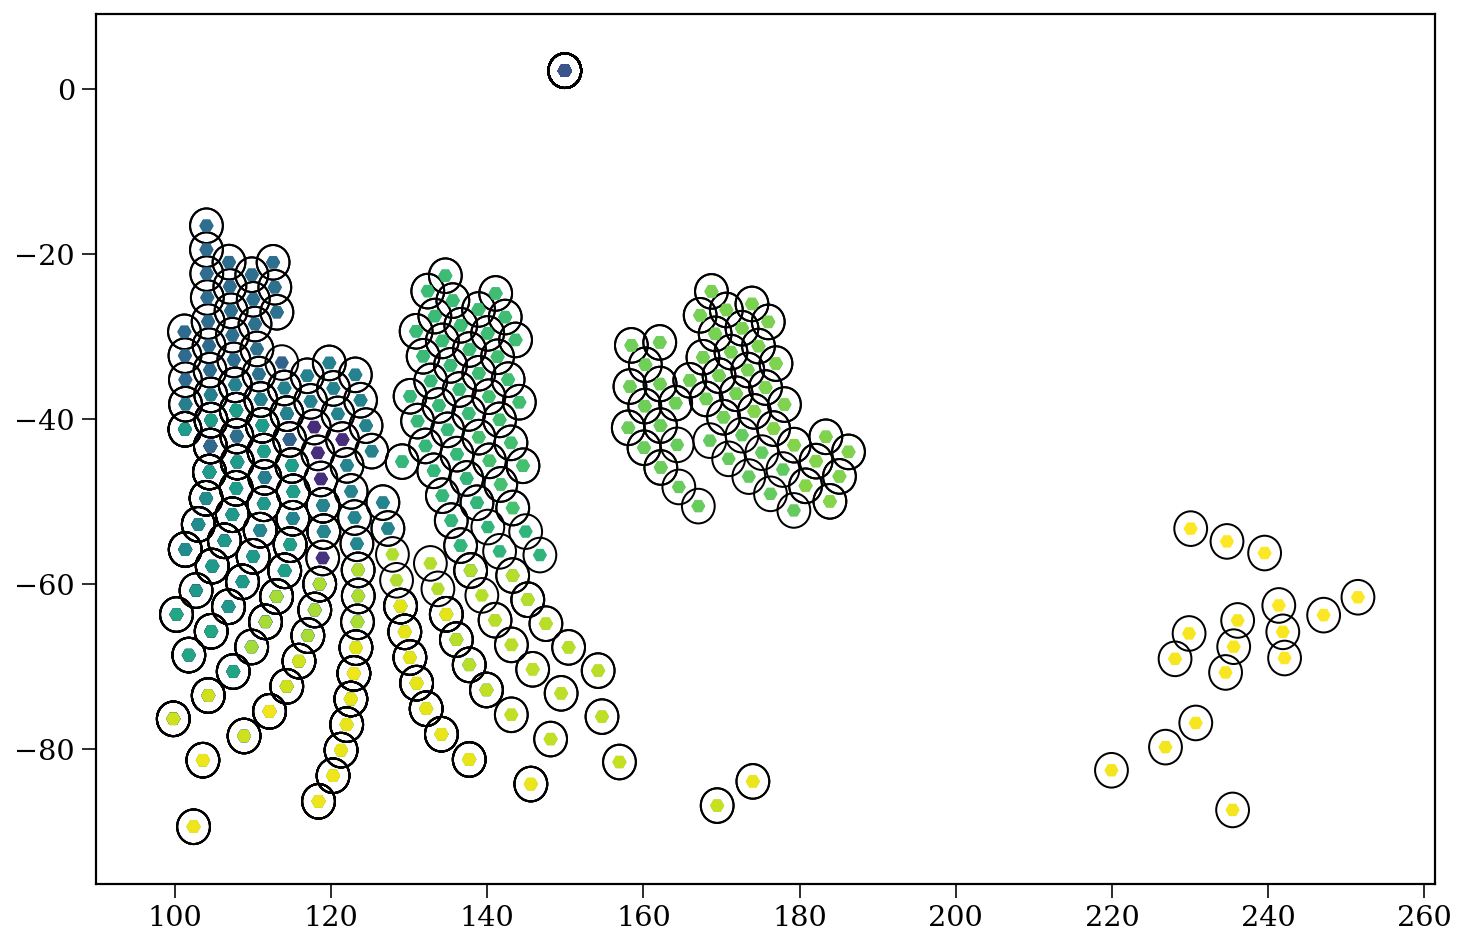

In [80]:
fig, ax = plt.subplots()

for i, row in df.iterrows():
    ax.add_patch(plt.Circle(xy=(row["fieldRA"], row["fieldDec"]), radius=2.1, fc="none", ec="black"))
    
plt.scatter(df["fieldRA"], df["fieldDec"], marker="H", c=df["observationStartMJD"])
plt.show()